In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

In [64]:
plt.rcParams['figure.dpi'] = 150

## Matrix

In [8]:
class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        sum = 0
        for i in range(self.n_iter):
            self.JHist.append((self.computeCost(X, y, theta), theta))
#             print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta)
            theta = theta - (self.alpha / n * ((-2 * np.matmul(X.T, y)) + (2 * np.matmul(np.matmul(X.T, X), theta))))
#         print(" Cost: ", self.JHist[i][0], " Theta: ", theta)
        return theta

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** make certain you don't return a matrix with just one value! **
        '''
        n,d = X.shape
        cost = 1 / 2 / n * np.matmul((np.matmul(X, theta) - y).T, (np.matmul(X, theta) - y))
        return cost[0, 0]
        # TODO: add objective (cost) equation here


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)

    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        y_pred = np.matmul(X, self.theta)
        return y_pred
        # TODO:  add prediction function here


## Model Evaluation with Holdout Set

In [4]:
def Train_model(dataPath, alpha, n_iter):

    # load the data
    file = open(dataPath, 'r')
    allData = np.loadtxt(file, delimiter=',')

    X = np.matrix(allData[:, :-1])
    y = np.matrix((allData[:, -1])).T

    n, d = X.shape

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Add a row of ones for the bias term
    X = np.c_[np.ones((n, 1)), X]

    init_theta = np.matrix(np.random.randn((d + 1))).T

    lr_model = LinearRegression(init_theta=init_theta, alpha=alpha, n_iter=n_iter)
    lr_model.fit(X, y)
    return lr_model


def calculate_loss(y, y_predicted):

    # TODO : implement a function to calculate MSE and RMSE
    n, d = y.shape
    sum_square = 0
    for i in range(0, n):
        sum_square += (y[i, 0] - y_predicted[i, 0])**2
    MSE_loss = sum_square / n
    RMSE_loss = np.sqrt(MSE_loss)
    return MSE_loss, RMSE_loss


def model_evaluation(filePath, model):

    # load the data
    file = open(filePath, 'rb')
    allData = np.load(file)['arr_0']

    X = np.matrix(allData[:, :-1])
    y = np.matrix((allData[:, -1])).T

    n, d = X.shape

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Add a row of ones for the bias term
    X = np.c_[np.ones((n, 1)), X]

    return calculate_loss(y, model.predict(X))

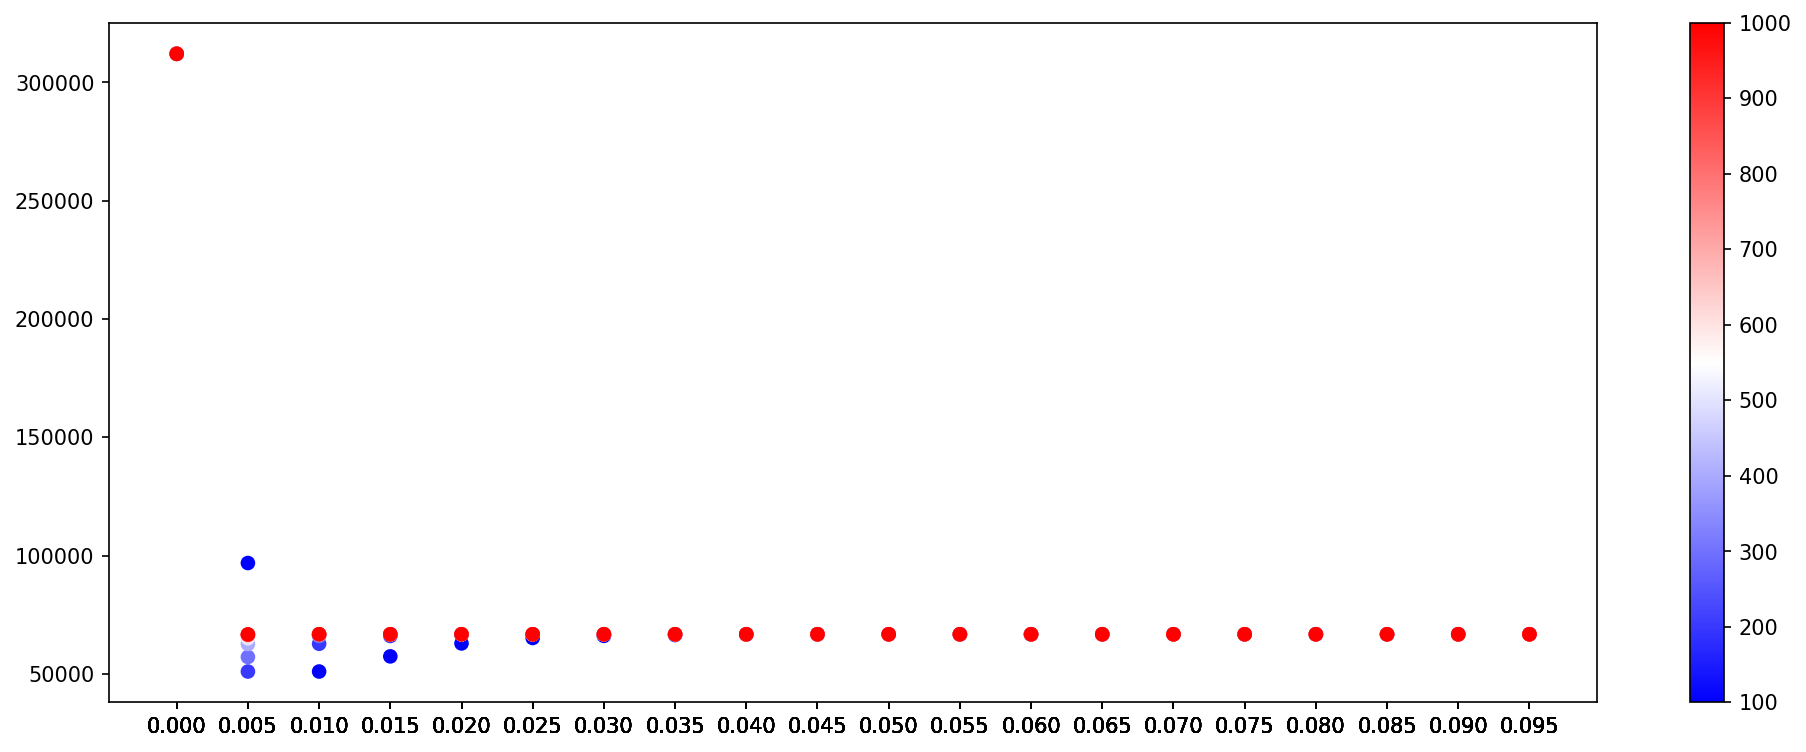

In [80]:
grid_dict = {'alpha':[], 'n_iter':[], 'RMSE_loss':[]}
# Selecting alpha
for alpha in np.arange(0, 0.1, 0.005):
    for n_iter in np.arange(100, 1100, 100):
        grid_dict['alpha'].append(alpha)
        grid_dict['n_iter'].append(n_iter)
        model = Train_model(dataPath="D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_1\\Source code\\data\\multivariateData.dat",
                         alpha=alpha,
                         n_iter=n_iter)
        MSE_loss, RMSE_loss = model_evaluation(filePath="D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_1\\Source code\\data\\holdout.npz",
                         model=model)
        grid_dict['RMSE_loss'].append(RMSE_loss)
        
plt.figure(figsize=(16, 6))
plt.xticks(grid_dict['alpha'])
plt.scatter(grid_dict['alpha'], grid_dict['RMSE_loss'], c=grid_dict['n_iter'], cmap='bwr')
plt.colorbar()

In [9]:
# alpha=0.005, n_iter=200 is the best combination
model = Train_model(dataPath="D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_1\\Source code\\data\\multivariateData.dat",
                 alpha=0.005,
                 n_iter=200)
MSE_loss, RMSE_loss = model_evaluation(filePath="D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_1\\Source code\\data\\holdout.npz",
                 model=model)
print(f'MSE = {MSE_loss}\nRMSE = {RMSE_loss}')

MSE = 2604492064.9179277
RMSE = 51034.22444710929
